# Understanding Descriptive Statistics

Import the necessary libraries here:

In [50]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [51]:
# your code here
dice_roll = np.random.randint(1,7,size = 10)
dice_roll_df = pd.DataFrame({"Rolls":dice_roll})
display(dice_roll_df)

,Rolls
0,6
1,2
2,3
3,2
4,5
5,3
6,3
7,2
8,3
9,2


#### 2.- Plot the results sorted by value.

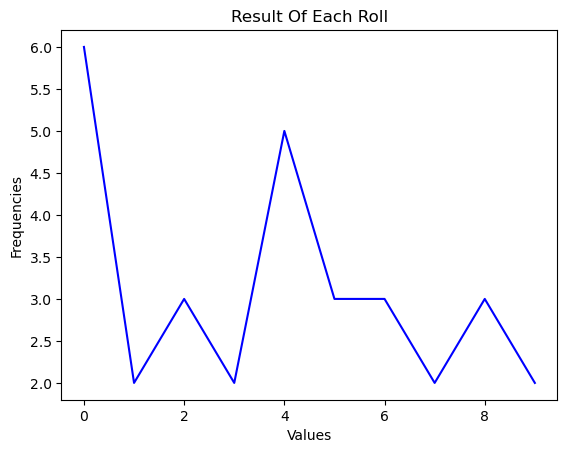

In [52]:
# your code here
sorted_dice_rolls_df = dice_roll_df['Rolls'].value_counts().sort_index()
sorted_dice_rolls_df

plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.title('Result Of Each Roll')
plt.plot(dice_roll_df,'b-')

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

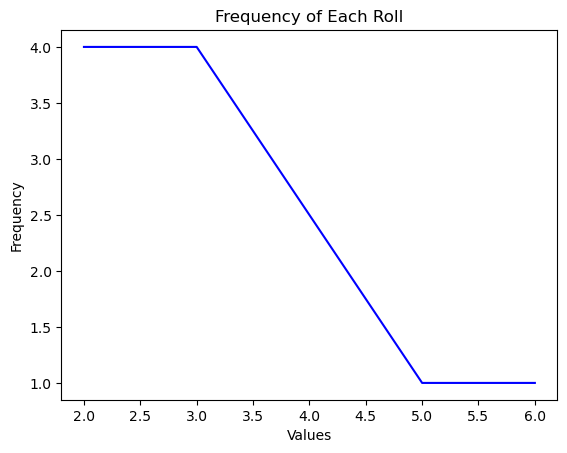

In [53]:
plt.plot(sorted_dice_rolls_df,'b-')
plt.title('Frequency of Each Roll')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

In [54]:
"""
The first plot represents the result of each value roll.
The second plot represents the frequency of each roll
"""

'\nThe first plot represents the result of each value roll.\nThe second plot represents the frequency of each roll\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [55]:
# your code here
def calculate_mean(df):
  mean = (np.sum(df))/len(df)
  return mean

result_mean = calculate_mean(dice_roll)
display(result_mean)

3.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [56]:
# your code here
def calculate_fd(df):
  frequency_distribution = {}
  for value in df:
    if value in frequency_distribution:
        frequency_distribution[value] += 1
    else:
        frequency_distribution[value] = 1
  return frequency_distribution

result_fd = calculate_fd(dice_roll)
display(result_fd)

{6: 1, 2: 4, 3: 4, 5: 1}

In [57]:
def calculate_mean2(freq_dict):
    sum_of_products = sum(a * b for a, b in freq_dict.items())
    mean2 = sum_of_products / sum(freq_dict.values())
    return mean2

result_mean2 = calculate_mean2(result_fd)
display(result_mean2)

3.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [58]:
# your code here
def calculate_median(data):
    data.sort()
    num_observations = len(data)

    if num_observations % 2 == 0:
        mid_idx = num_observations // 2
        median = (data[mid_idx - 1] + data[mid_idx]) / 2
    else:
        mid_idx = num_observations // 2
        median = data[mid_idx]
    return median

result_median = calculate_median(dice_roll)
display(result_median)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [59]:
# your code here
def calculate_quartiles(data):
    data.sort()

    num_observations = len(data)
    q2 = calculate_median(data)

    lower_half = data[:num_observations // 2] if num_observations % 2 == 0 else data[:num_observations // 2]
    q1 = calculate_median(lower_half)

    upper_half = data[num_observations // 2 + 1:] if num_observations % 2 == 0 else data[num_observations // 2 + 1:]
    q3 = calculate_median(upper_half)

    return q1, q2, q3

result_quartiles = calculate_quartiles(dice_roll)
display(result_quartiles)


(2, 3.0, 4.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


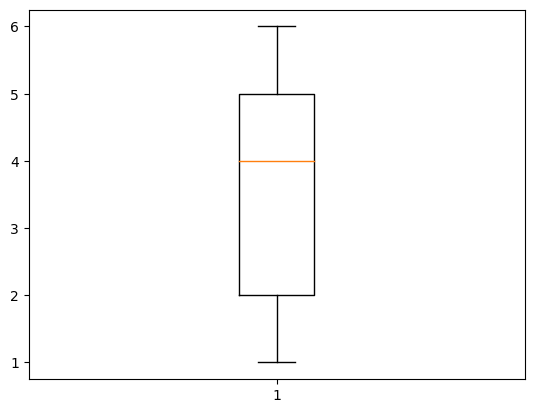

In [60]:
# your code here
hundred_rolls = pd.read_csv("../data/roll_the_dice_hundred.csv")
display(hundred_rolls)
hd_rolls = hundred_rolls.sort_values(by=['value'])
plt.boxplot(hd_rolls['value'])
plt.show()

In [61]:
"""
your comments here
For what we can see on those 100 roll's, the diced landed mostly on the value 4. With the minimun on the value 1 and maximum on the value 6. There was a larger concentration between values 2 untill 5.
"""

"\nyour comments here\nFor what we can see on those 100 roll's, the diced landed mostly on the value 4. With the minimun on the value 1 and maximum on the value 6. There was a larger concentration between values 2 untill 5.\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [62]:
# your code here
result_mean = calculate_mean(hd_rolls["value"])
display(result_mean)


3.74

#### 3.- Now, calculate the frequency distribution.


In [63]:
# your code here
result_fd = calculate_fd(hd_rolls["value"])
display(result_fd)

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

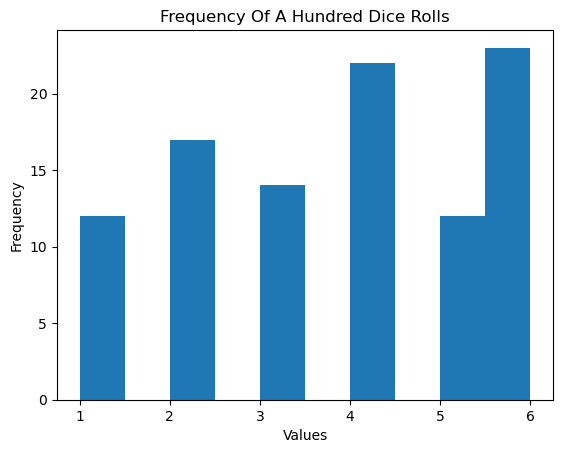

In [95]:
# your code here
plt.hist(hd_rolls['value'])
plt.title('Frequency Of A Hundred Dice Rolls')
plt.ylabel("Frequency")
plt.xlabel("Values")
plt.show()

In [65]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

{5: 149, 6: 166, 1: 175, 2: 167, 4: 168, 3: 175}

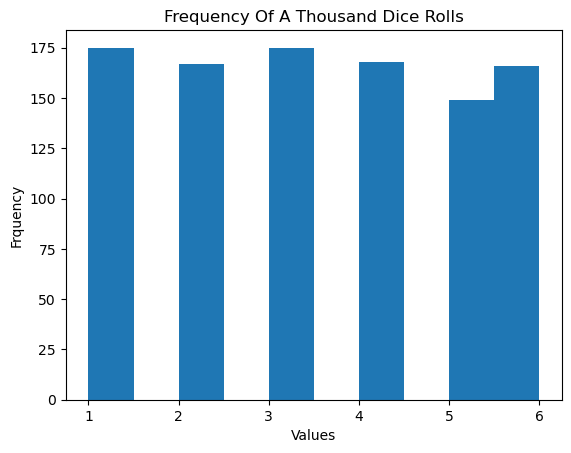

In [96]:
# your code here
thousand_rolls = pd.read_csv("../data/roll_the_dice_thousand.csv")
thousand_rolls

result_fd = calculate_fd(thousand_rolls["value"])
display(result_fd)

plt.hist(thousand_rolls["value"])
plt.ylabel("Frquency")
plt.xlabel("Values")
plt.title('Frequency Of A Thousand Dice Rolls')
plt.show()

In [67]:
"""
The odds of getting X value would be the same for each of the other values. So the frequency of the value per roll should stay near to the possible rest values.
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


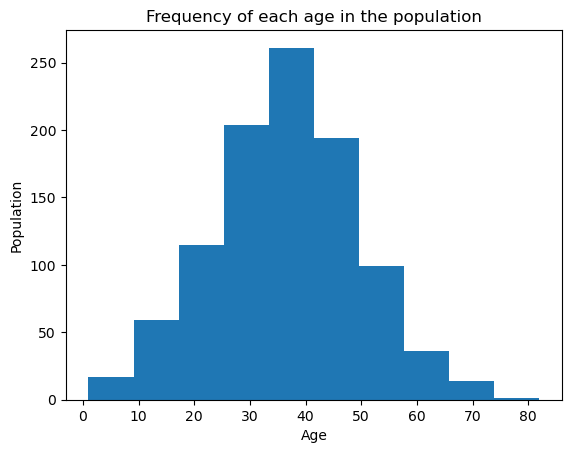

In [101]:
# your code here
ages_pop = pd.read_csv("../data/ages_population.csv")
display(ages_pop)

result_fd = calculate_fd(ages_pop["observation"])

plt.hist(ages_pop["observation"])
plt.ylabel("Population")
plt.xlabel("Age")
plt.title('Frequency of each age in the population')
plt.show()

In [104]:
'''
    After analyzing the graph I would guess that the average/mean age is between 30 to 40 years old and the standard deviation is around 15 years.
'''

''

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [103]:
# your code here
print(ages_pop.mean())
print(np.std(ages_pop))

observation    36.56
dtype: float64
observation    12.81009
dtype: float64


In [70]:
"""
Yes, Mean = 36.56 and STD = 12.81
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

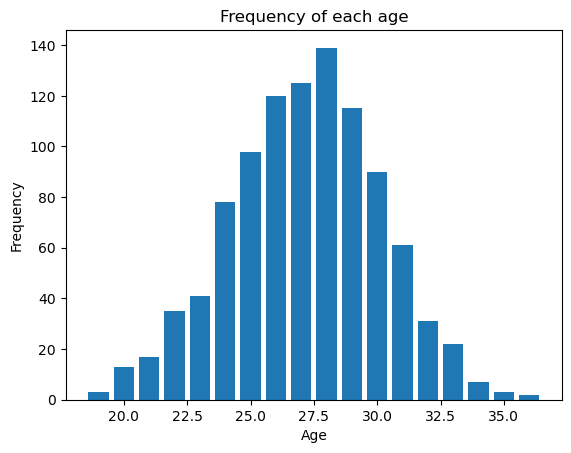

{25.0: 98,
 31.0: 61,
 29.0: 115,
 28.0: 139,
 30.0: 90,
 24.0: 78,
 26.0: 120,
 21.0: 17,
 27.0: 125,
 23.0: 41,
 22.0: 35,
 32.0: 31,
 20.0: 13,
 33.0: 22,
 19.0: 3,
 34.0: 7,
 35.0: 3,
 36.0: 2}

In [128]:
# your code here
ages_pop2 = pd.read_csv("../data/ages_population2.csv")

ages_dict2 = Counter(ages_pop2['observation'])
ages2 = list(ages_dict2.keys())
freq2 = list(ages_dict2.values())


plt.bar(ages2, freq2)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of each age')

plt.show()

result_fd2 = calculate_fd(ages_pop2["observation"])
display(result_fd2)


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [72]:
"""
The population on this data is alot younger compared with the previous data from step1
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [129]:
# your code here
print(ages_pop2.mean())
print(np.std(ages_pop2))

observation    27.155
dtype: float64
observation    2.968329
dtype: float64


In [74]:
"""
The average on this data is around 27 years old with only almost 3 years of std.
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

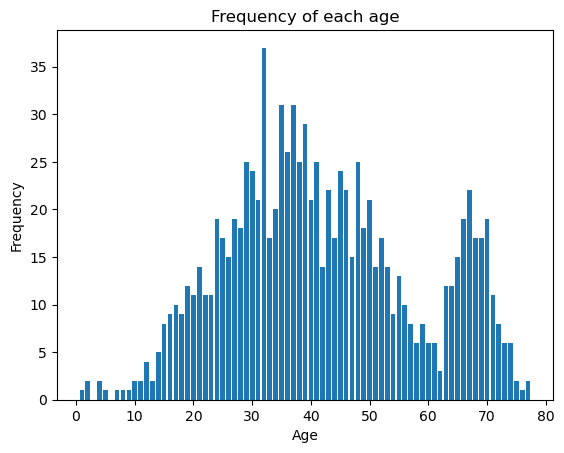

{21.0: 14,
 24.0: 19,
 31.0: 21,
 54.0: 9,
 52.0: 17,
 37.0: 31,
 69.0: 17,
 36.0: 26,
 30.0: 24,
 64.0: 12,
 76.0: 1,
 73.0: 6,
 42.0: 14,
 67.0: 22,
 28.0: 18,
 50.0: 21,
 70.0: 19,
 57.0: 8,
 20.0: 11,
 27.0: 19,
 51.0: 14,
 56.0: 10,
 44.0: 17,
 49.0: 18,
 65.0: 15,
 32.0: 37,
 18.0: 9,
 45.0: 24,
 40.0: 21,
 66.0: 19,
 72.0: 8,
 43.0: 22,
 48.0: 25,
 35.0: 31,
 41.0: 25,
 17.0: 10,
 23.0: 11,
 47.0: 15,
 33.0: 17,
 15.0: 8,
 26.0: 15,
 75.0: 2,
 29.0: 25,
 55.0: 13,
 63.0: 12,
 39.0: 29,
 46.0: 22,
 22.0: 11,
 71.0: 11,
 68.0: 17,
 60.0: 6,
 34.0: 20,
 61.0: 6,
 12.0: 4,
 38.0: 25,
 74.0: 6,
 25.0: 17,
 53.0: 14,
 62.0: 3,
 59.0: 8,
 19.0: 12,
 77.0: 2,
 14.0: 5,
 16.0: 9,
 1.0: 1,
 11.0: 2,
 13.0: 2,
 9.0: 1,
 10.0: 2,
 2.0: 2,
 8.0: 1,
 58.0: 6,
 4.0: 2,
 5.0: 1,
 7.0: 1}

In [143]:
# your code here
ages_pop3 = pd.read_csv("../data/ages_population3.csv")

ages_dict3 = Counter(ages_pop3['observation'])
ages3 = list(ages_dict3.keys())
freq3 = list(ages_dict3.values())


plt.bar(ages3, freq3)

plt.title('Frequency of each age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

result_fd3 = calculate_fd(ages_pop3["observation"])
display(result_fd3)


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [138]:
# your code here
print(ages_pop3.mean())
print(np.std(ages_pop3))

observation    41.989
dtype: float64
observation    16.136632
dtype: float64


In [77]:
"""
This time we have alot more range on ages, reaching almost to 80 years old and with a higher std of 16 years.
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [147]:
# your code here
q1 = np.percentile(ages_pop3, 25)
q2 = np.percentile(ages_pop3, 50)
q3 = np.percentile(ages_pop3, 75)

print("Q1:", q1)
print("Q2 (median):", q2)
print("Q3:", q3)

Q1: 30.0
Q2 (median): 40.0
Q3: 53.0


In [79]:
"""
Since the median is 40 we can see that we are talking about an older population and since the Q3 is higher we are talking about an older population.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [149]:
p1 = np.percentile(ages_pop3, 20)
p2 = np.percentile(ages_pop3, 40)
p3 = np.percentile(ages_pop3, 60)
p4 = np.percentile(ages_pop3, 80)

print("P1:", p1)
print("P2:", p2)
print("P3:", p3)
print("P4:", p4)

P1: 28.0
P2: 36.0
P3: 45.0
P4: 57.0


In [81]:
"""
The main age of this data giving is higher than the previous ones.
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [82]:
# your code here

In [83]:
"""
your comments here
"""

'\nyour comments here\n'